#### Set Up Problem

In [1]:
import numpy as np
import openmdao.api as om

from cmaes_driver import CMAESDriver

class MyComp(om.ExplicitComponent):

    def setup(self):
        self.add_input('x', np.zeros((2, )))

        self.add_output('a', 0.0)
        self.add_output('b', 0.0)
        self.add_output('c', 0.0)
        self.add_output('d', 0.0)

    def compute(self, inputs, outputs):
        x = inputs['x']

        outputs['a'] = (2.0*x[0] - 3.0*x[1])**2
        outputs['b'] = 18.0 - 32.0*x[0] + 12.0*x[0]**2 + 48.0*x[1] - 36.0*x[0]*x[1] + 27.0*x[1]**2
        outputs['c'] = (x[0] + x[1] + 1.0)**2
        outputs['d'] = 19.0 - 14.0*x[0] + 3.0*x[0]**2 - 14.0*x[1] + 6.0*x[0]*x[1] + 3.0*x[1]**2

prob = om.Problem()
model = prob.model

model.add_subsystem('comp', MyComp())
model.add_subsystem('obj', om.ExecComp('f=(30 + a*b)*(1 + c*d)'))

model.connect('comp.a', 'obj.a')
model.connect('comp.b', 'obj.b')
model.connect('comp.c', 'obj.c')
model.connect('comp.d', 'obj.d')

# Played with bounds so we don't get subtractive cancellation of tiny numbers.
model.add_design_var('comp.x', lower=np.array([0.2, -1.0]), upper=np.array([1.0, -0.2]))
model.add_objective('obj.f')

#### Set driver to `CMAESDriver` and set CMA options

In [2]:
prob.driver = CMAESDriver()
prob.driver.CMAOptions['popsize'] = 10

#### Run driver

In [3]:
prob.setup()
prob.set_val('comp.x', np.array([0.2, -0.2]))

fail = prob.run_driver()
assert fail == False

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 2 (seed=482557, Fri Oct 23 06:27:55 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 4.613855864063028e+02 1.0e+00 8.94e-02  7e-02  1e-01 0:00.0
    2     20 5.714518686289950e+02 1.7e+00 1.16e-01  8e-02  2e-01 0:00.0
    3     30 3.725310630575848e+02 2.4e+00 1.45e-01  1e-01  2e-01 0:00.1
   76    760 1.237306068048946e+01 2.0e+00 5.47e-05  7e-09  1e-08 0:01.1
termination on tolfun=1e-11 (Fri Oct 23 06:27:56 2020)
final/bestever f-value = 1.237306e+01 1.237306e+01
incumbent solution: [0.2000000000000001, -0.8865219876921213]
std deviation: [1.4154261526932784e-08, 7.205139451930807e-09]


#### Results:

In [4]:
print(prob['obj.f'])   # expect 12.37306086
print(prob['comp.x'])  # expect [0.2, -0.88653391]

[12.37306068]
[ 0.2        -0.88652198]


#### Use CMA methods to access optimization details

/home/swryan/anaconda3/envs/OM/lib/python3.8/site-packages/cma/logger.py:874: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  color = iter(pyplot.cm.cmap_d['plasma_r'](np.linspace(0.35, 1,


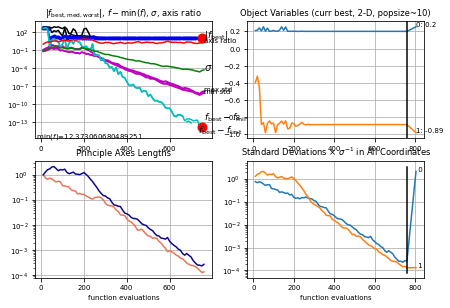

In [5]:
import cma
logger = cma.plot()

In [6]:
logger.disp([0, -1])  # first and last

Iterat Nfevals  function value    axis ratio maxstd  minstd
    1     10 4.61385586406303e+02 1.0e+00 1.15e-01 6.80e-02
   76    760 1.23730606804895e+01 2.0e+00 1.42e-08 7.21e-09
Iterat Nfevals  function value    axis ratio maxstd  minstd
   75    750 1.23730606804893e+01 1.8e+00 1.06e-08 5.92e-09
